In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import lib.BasicMeasurement as basic
import lib.plot as plot
import lib.ResolverMeasurement as resolver
from lib.Database import Database

In [2]:
source = 'public1000-3/combined'
measurement = "enum"
db = Database(source)

## Functions

In [38]:

def vp_vs_egress(data, ax):
  
  # Constants
  BAR_WIDTH = 0.5
  
  unique_egress_all = data.get_unique_egress_ips()
  num_unique_egress = len(unique_egress_all)
  vps = data.get_vantagepoints()

  # Create a dict of vantage point to list of counts of egress ips
  vp_to_egress_count = dict(zip(vps, [np.zeros(num_unique_egress) for _ in range(len(vps))]))

  for vp in vps:
    counter = Counter(data.get_egress_ips(vp))
    for i, egressIP in enumerate(unique_egress_all, 0):
      vp_to_egress_count[vp][i] = counter[egressIP]

  # Height for stacking the bars
  bottom = np.zeros(num_unique_egress)

  label_map = {"138.68.96.43": "FRA", "157.230.97.126": "FRA", "146.190.91.208": "NYC", "159.203.105.218": "SIN"}
  # Plot all egress resolver bars for each vantage point
  for vp, counts in vp_to_egress_count.items():
      p = ax.bar(unique_egress_all, counts, BAR_WIDTH, label=f"{vp} ({label_map[vp]})", bottom=bottom)
      bottom += counts

  # Rotate labels
  plt.xticks(rotation=30, ha='right')
  # Limit number of x tick labels
  labels = unique_egress_all
  stride = max(int(len(labels) / 10), 1)
  #Set all labels between stride to empty string
  for i, label in enumerate(labels):
    if i % stride != 0:
      labels[i] = ''
  ax.set_xticklabels(labels)
  #ax.set_xticks(unique_egress_all)
  #ax.xaxis.set_major_locator(plt.MaxNLocator(15))
  ax.set_xlabel("unique egress IPs")
  ax.set_ylabel("number of log entries")
  ax.set_title(f"Resolver at {data.get_resolver()} ({len(unique_egress_all)} IPs)")
  ax.legend(loc="upper right")
  return ax

In [4]:
def load_resolver(ip):
  with open(f"{db.ns_folder(ip)}/{measurement}", 'r') as f:
    data = [basic.BasicMeasurement(json.loads(line)) for line in f]
    return resolver.ResolverMeasurement(data)

In [3]:
print(db.ns_folder("8.8.8.8"))

measurement = "enum"
rr = "8.8.8.8"

with open(f"{db.ns_folder(rr)}/{measurement}", 'r') as f:
  data = [basic.BasicMeasurement(json.loads(line)) for line in f]
  rm = resolver.ResolverMeasurement(data)

public1000-3/combined/data/8.8/8.8.8.8


/tmp/ipykernel_149621/3422582470.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


<Axes: title={'center': 'Resolver at 8.8.8.8 (239 IPs)'}, xlabel='unique egress IPs', ylabel='number of log entries'>

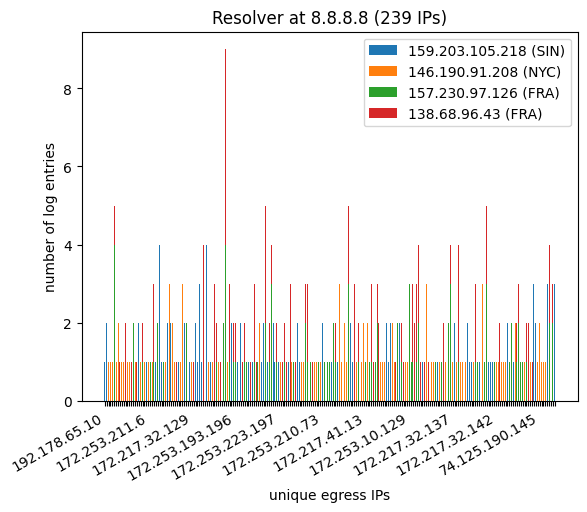

In [34]:
m = load_resolver("8.8.8.8")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

In [16]:
filename = "240113-public60/1-egress.json"

data = []
with open(filename, 'r') as f:
    data = [basic.BasicMeasurement(json.loads(l)) for l in f]

#data = [d for d in data if d.has_logentries()]

In [17]:
nsdata = by_ns.group_by_nameserver(data)



## Example of a vp_per_egress plot

/tmp/ipykernel_149621/3730980083.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


<Axes: title={'center': 'Resolver at 8.8.8.8 (239 IPs)'}, xlabel='unique egress IPs', ylabel='number of log entries'>

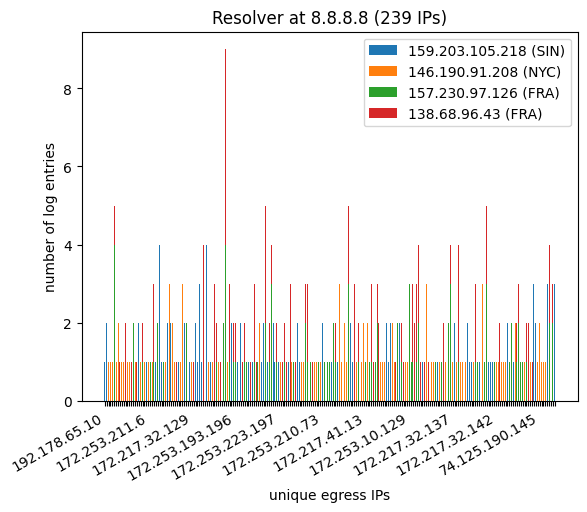

In [40]:

m = load_resolver("8.8.8.8")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

## IP-based Loadbalancing


### IP-based Loadbalancing per Basic Measurements

- examples of resolvers where all basic measurements observe IP-based loadbalancing
- this should be equivalent with IP-based loadbalancing observed for ALL PoPs

#### Example 1

<Axes: title={'center': 'Nameserver at 80.80.80.80'}>

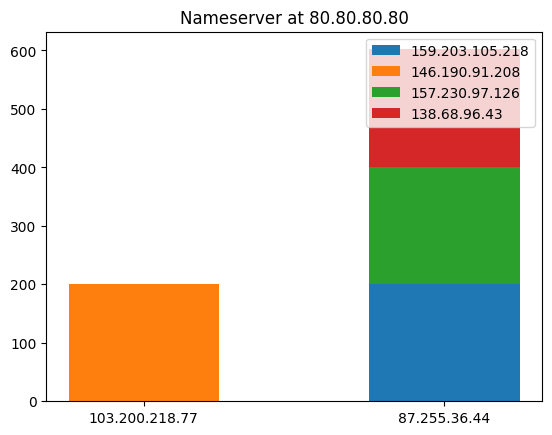

In [15]:

m = load_resolver("80.80.80.80")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Example 2

<Axes: title={'center': 'Nameserver at 176.103.130.132'}>

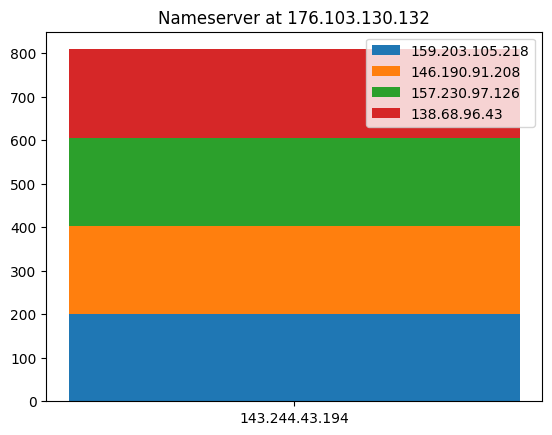

In [16]:

m = load_resolver("176.103.130.132")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Example 3

/tmp/ipykernel_149621/3730980083.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


<Axes: title={'center': 'Resolver at 216.146.35.35 (3 IPs)'}, xlabel='unique egress IPs', ylabel='number of log entries'>

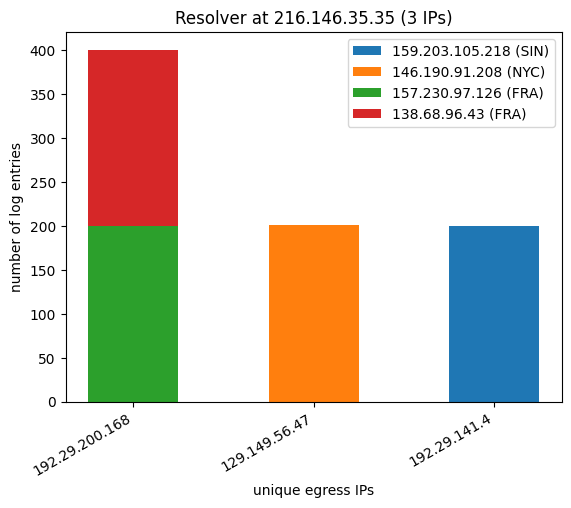

In [39]:

m = load_resolver("216.146.35.35")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

### IP-based Loadbalancing per PoP

In [5]:
# Prepare data
balancing_per_pop = [n for n in nsdata if n.cs_loadbalancing_pops()]

#### For any / at least one PoP, IP-based loadbalancing is observed

<Axes: title={'center': 'Nameserver at 80.80.80.80'}>

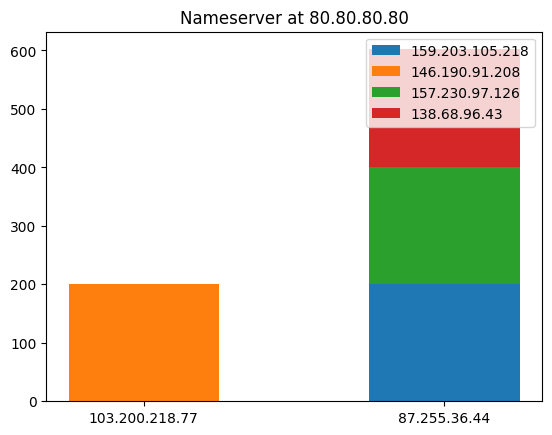

In [18]:

m = load_resolver("80.80.80.80")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

30


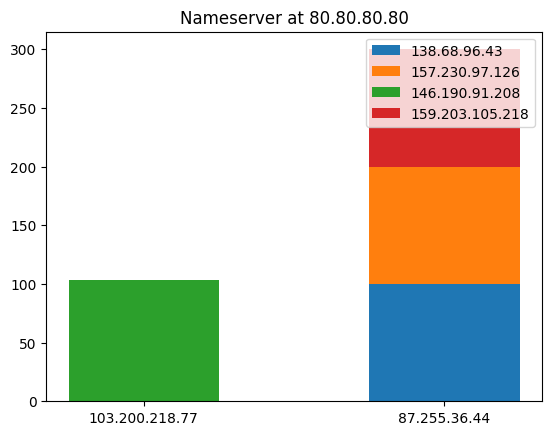

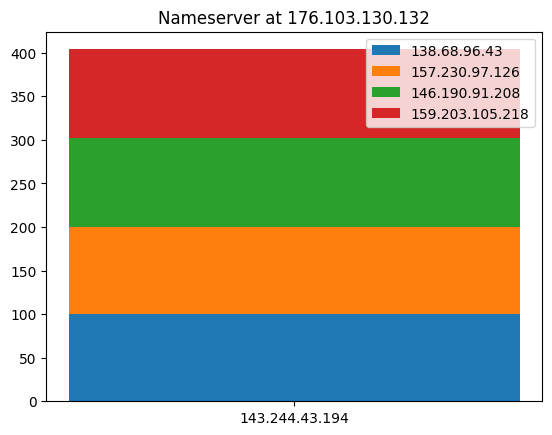

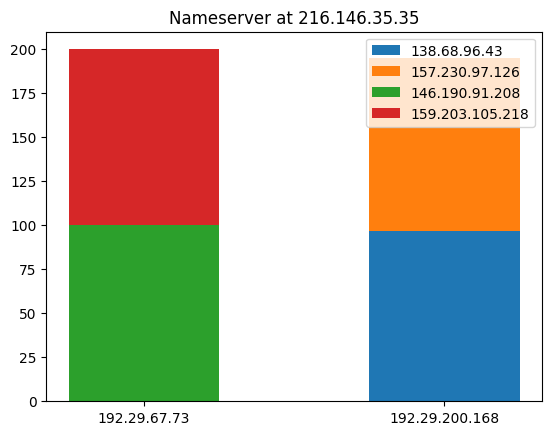

In [7]:
balancing_per_pop = [n for n in balancing_per_pop if n.loadbalancing_ip_based_any_pops()]
print(len(balancing_per_pop))

examples = ["80.80.80.80", "176.103.130.132", "216.146.35.35"]

#d = ip_balancing[19]
#fig, ax = plt.subplots(1, 1)
#plot.subplot_vp_per_egress(d, ax)

for ns in [d for d in ip_balancing if d.get_nameserver() in examples]:
#for ns in balancing_per_pop:
    fig, ax = plt.subplots(1,1)
    plot.subplot_vp_per_egress(ns, ax)

#### For no PoP is IP-based loadbalancing observed

In [8]:
balancing_per_pop = [n for n in balancing_per_pop if not n.loadbalancing_ip_based_any_pops()]
print(len(balancing_per_pop))

#for ns in [d for d in ip_balancing if d.get_nameserver() in examples]:
for ns in balancing_per_pop:
    fig, ax = plt.subplots(1,1)
    plot.subplot_vp_per_egress(ns, ax)

0


## Points of Presence

- cluster egress IPs per vantage point
- two vantage points hit the same PoP if the intersection of their egress IP sets is not empty
- additionally, we assert that the PoPs have disjunct egress IP sets

In [9]:
# Prepare data

# Excluding candidates that have measurements from less than 2 vantage points
pop_candidates = [n for n in nsdata if n.cs_get_pops()]

### Examples with 4 PoPs

#### Example 1

<Axes: title={'center': 'Nameserver at 95.85.95.85'}>

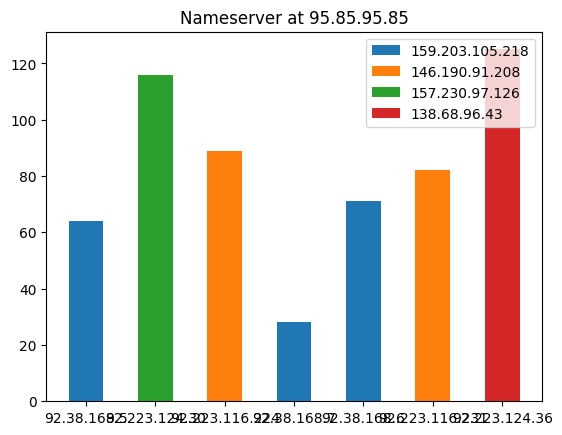

In [19]:

m = load_resolver("95.85.95.85")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Example 2

<Axes: title={'center': 'Nameserver at 114.114.114.114'}>

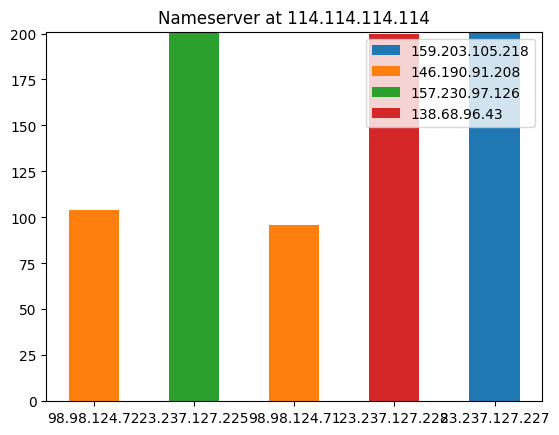

In [20]:

m = load_resolver("114.114.114.114")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Old Code

7


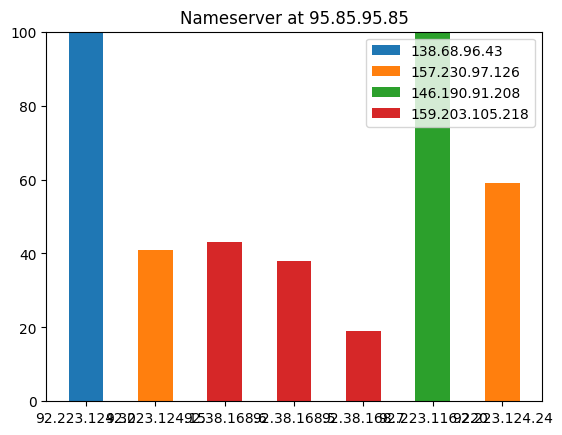

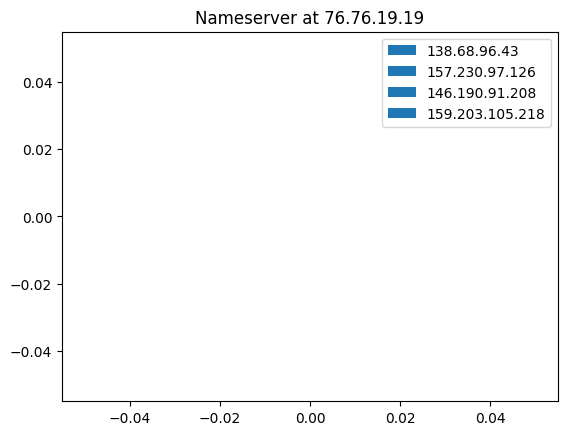

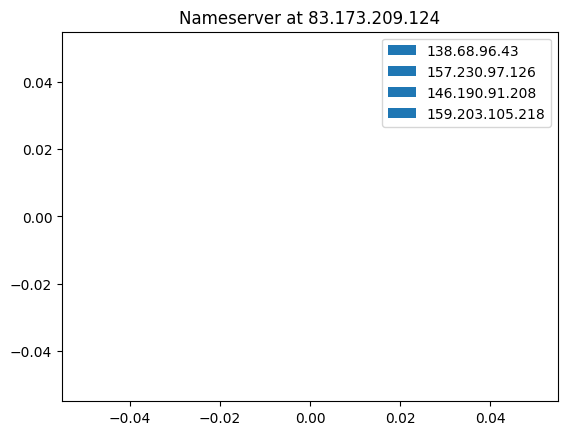

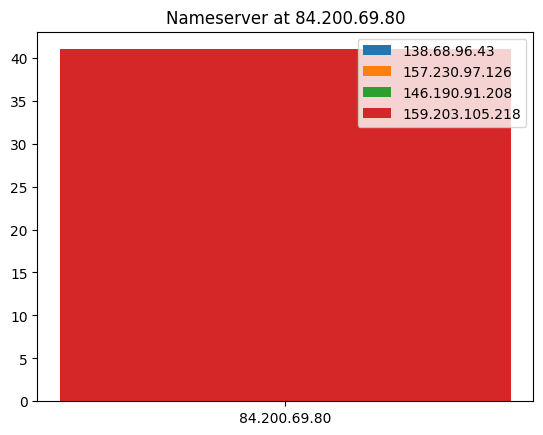

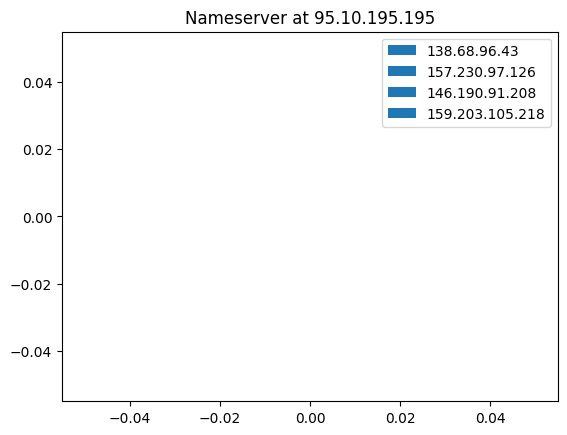

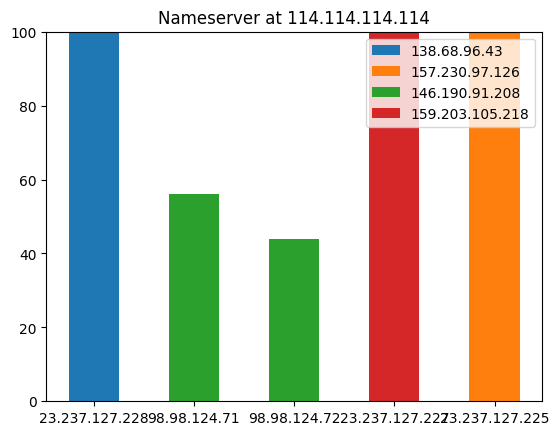

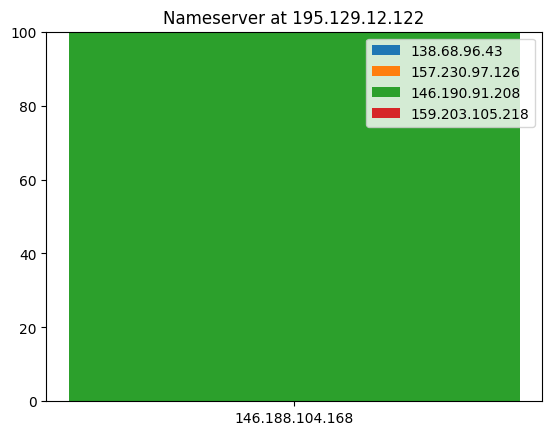

In [10]:
pops = [n for n in pop_candidates if len(n.get_pops()) == 4]
print(len(pops))

for ns in pops:
    fig, ax = plt.subplots(1,1)
    plot.subplot_vp_per_egress(ns, ax)

### Examples with 3 PoPs

#### Example 1

/tmp/ipykernel_149621/3422582470.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


<Axes: title={'center': 'Resolver at 9.9.9.9 (19 IPs)'}, xlabel='unique egress IPs', ylabel='number of log entries'>

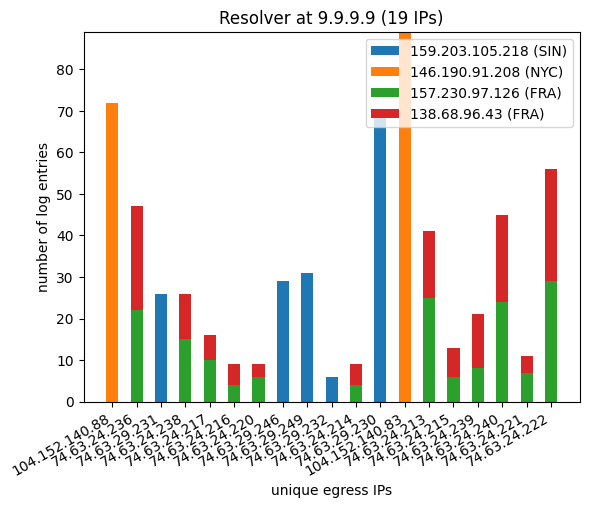

In [35]:

m = load_resolver("9.9.9.9")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Example 2

/tmp/ipykernel_149621/3422582470.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


<Axes: title={'center': 'Resolver at 1.1.1.1 (58 IPs)'}, xlabel='unique egress IPs', ylabel='number of log entries'>

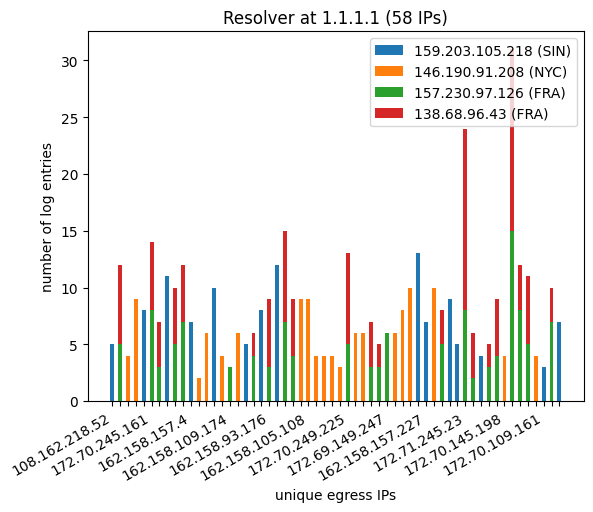

In [36]:

m = load_resolver("1.1.1.1")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Example 3

<Axes: title={'center': 'Nameserver at 8.26.56.26'}>

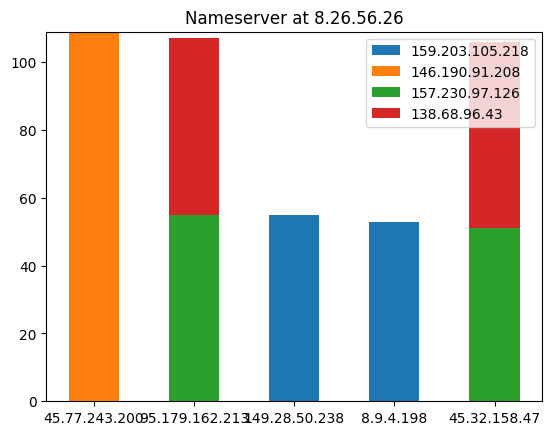

In [23]:

m = load_resolver("8.26.56.26")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

#### Old Code

24


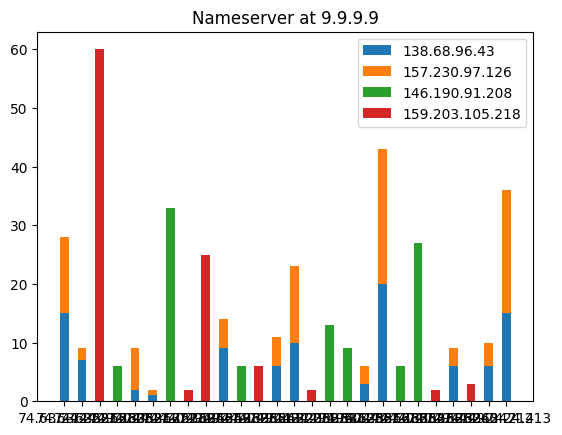

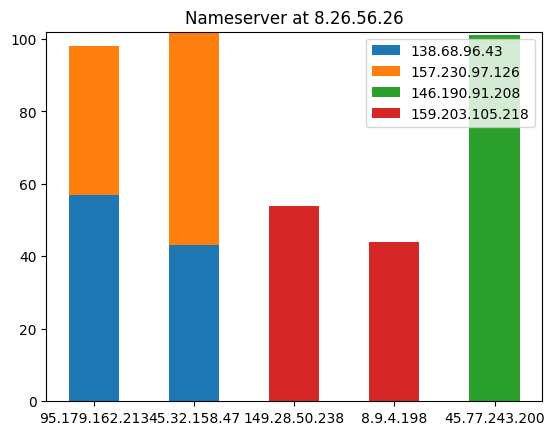

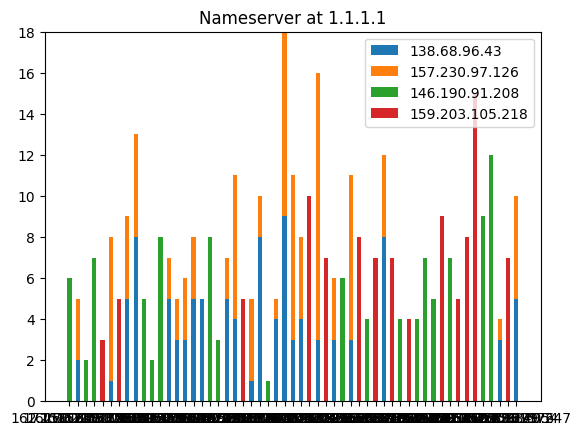

In [11]:
pops = [n for n in pop_candidates if len(n.get_pops()) == 3]
print(len(pops))

examples = ["1.1.1.1", "9.9.9.9", "8.26.56.26"]

for ns in [p for p in pops if p.get_nameserver() in examples]:
#for ns in pops:
    fig, ax = plt.subplots(1,1)
    plot.subplot_vp_per_egress(ns, ax)

### Examples with 2 PoPs

7


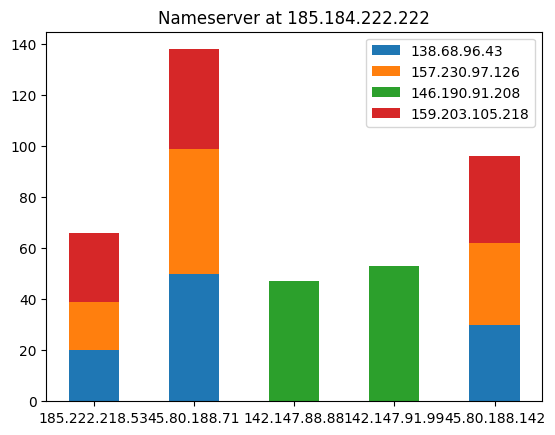

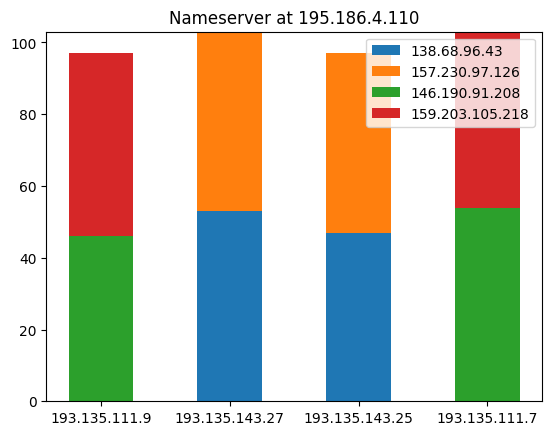

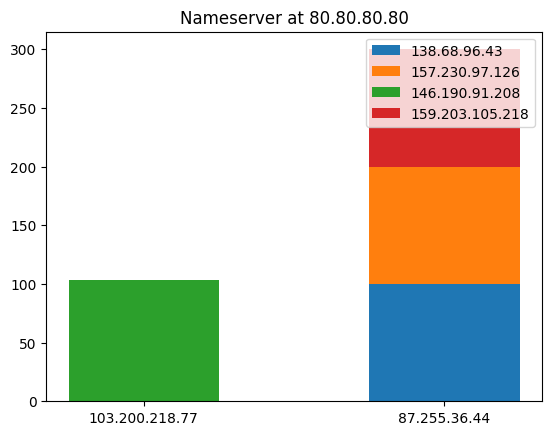

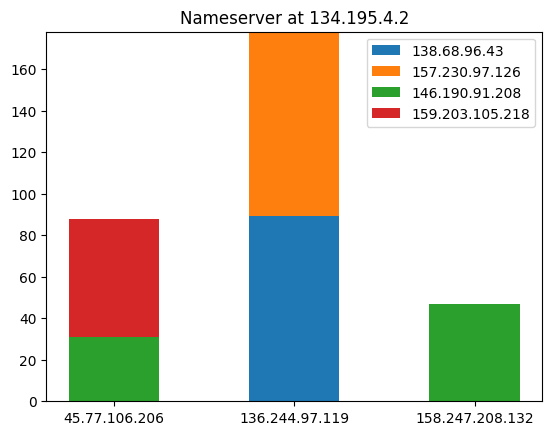

In [12]:
pops = [n for n in pop_candidates if len(n.get_pops()) == 2]
print(len(pops))

examples = ["185.184.222.222", "195.186.4.110", "80.80.80.80", "134.195.4.2"]

for ns in [p for p in pops if p.get_nameserver() in examples]:
#for ns in pops:
    fig, ax = plt.subplots(1,1)
    plot.subplot_vp_per_egress(ns, ax)

### Examples with 1 PoP

/tmp/ipykernel_149621/3730980083.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


<Axes: title={'center': 'Resolver at 62.91.19.67 (103 IPs)'}, xlabel='unique egress IPs', ylabel='number of log entries'>

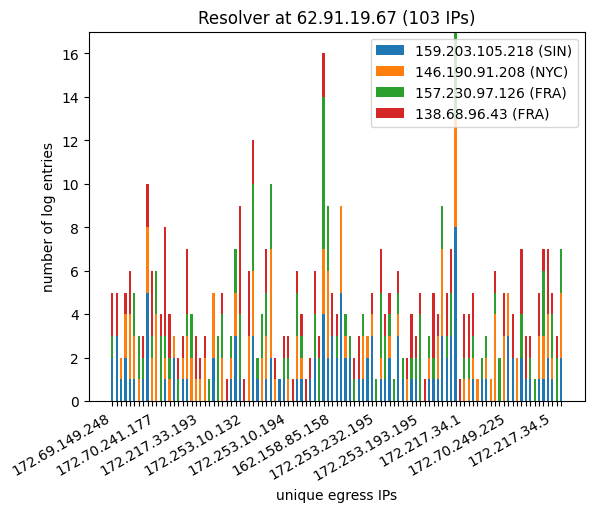

In [41]:

m = load_resolver("62.91.19.67")

fig, ax = plt.subplots()
vp_vs_egress(m, ax)

22


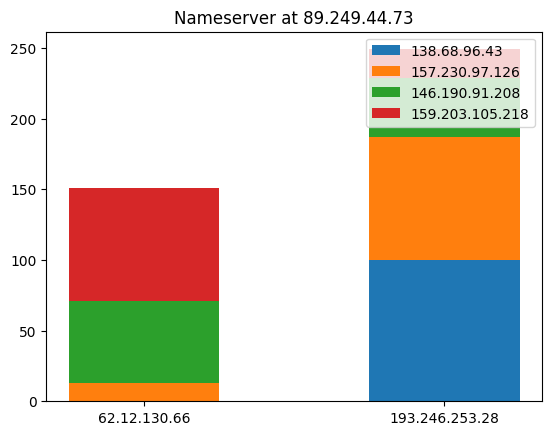

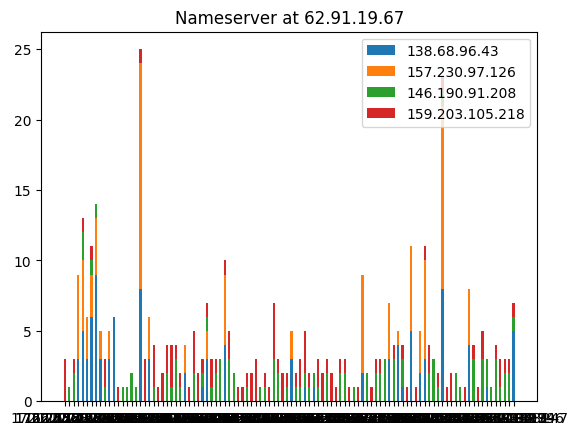

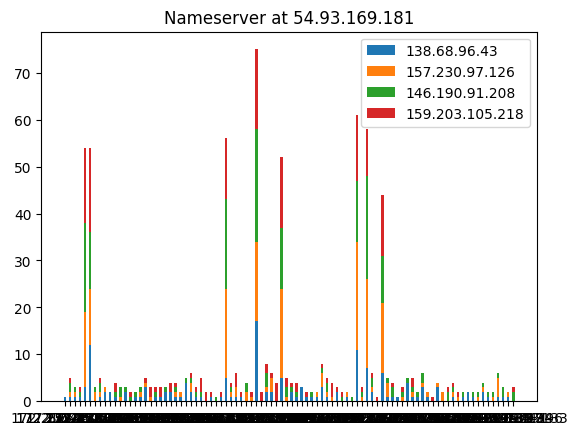

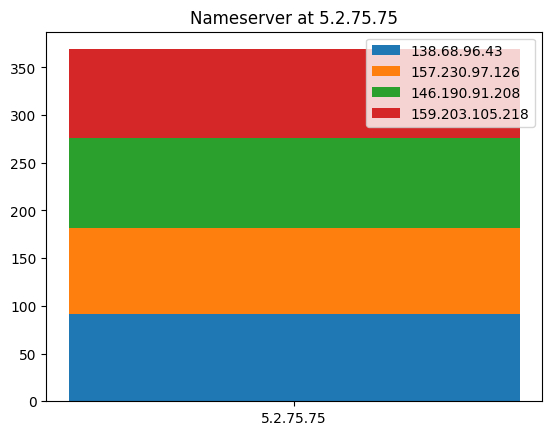

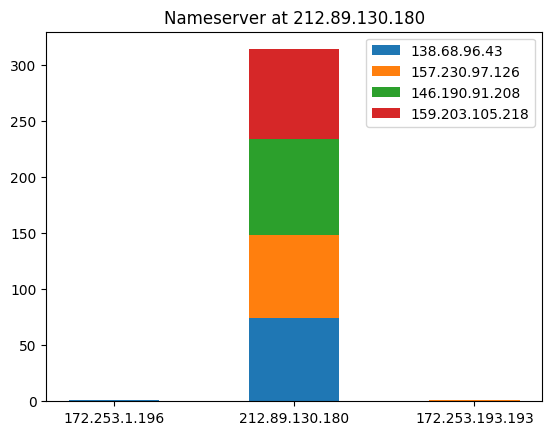

In [13]:
pops = [n for n in pop_candidates if len(n.get_pops()) == 1]
print(len(pops))

examples = ["62.91.19.67", "89.249.44.73", "54.93.169.181", "212.89.130.180", "117.50.10.10", "5.2.75.75"]

for ns in [p for p in pops if p.get_nameserver() in examples]:
#for ns in pops:
    fig, ax = plt.subplots(1,1)
    plot.subplot_vp_per_egress(ns, ax)

# MongoDB

In [ ]:
from pymongo import MongoClient

# Connect to the MongoDB server
client = MongoClient('mongodb://tower.grove:27017/')

client.list_database_names()

In [ ]:
db = client['testdb']

# Select or create a collection
collection = db['testcollection']

In [ ]:
collection.insert_many([d.d for d in data])

In [ ]:
resolvers = collection.find({'queries': {'$elemMatch': {'ns': '8.8.8.8'}}})

google_measurements = [basic.BasicMeasurement(d) for d in resolvers]

for m in google_measurements:
  print(m.get_nameservers())
  print(m.get_vantagepoint())